## Twitter Sentiment Analyzer



In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Categorize data
cols = ['sentiment','id','date','query_string','user','text']

# Load the dataset
df = pd.read_csv("./trainingandtestdata/training.1600000.processed.noemoticon.csv",header=None, names=cols, encoding="ISO-8859-1")
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Data preprocessing



In [2]:
import re
from bs4 import BeautifulSoup

# Tokenization
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

# Function for data cleaning
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
        
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    
    # Remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    
    return (" ".join(words)).strip()

In [4]:
# Testing
testing = df.text[:100]
test_result = []

for t in testing:
    test_result.append(tweet_cleaner(t))   

In [5]:
test_result

[u'awww that s a bummer you shoulda got david carr of third day to do it d',
 u'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 u'i dived many times for the ball managed to save the rest go out of bounds',
 u'my whole body feels itchy and like its on fire',
 u'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 u'not the whole crew',
 u'need a hug',
 u'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 u'k nope they didn t have it',
 u'que me muera',
 u'spring break in plain city it s snowing',
 u'i just re pierced my ears',
 u'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 u'it it counts idk why i did either you never talk to me anymore',
 u'i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown',
 u'i wish i got to watch it with you i miss you and how was the premiere',
 u'hollis deat

In [6]:
nums = [0,400000,800000,1200000,1600000]

# Parsing the first group of tweets
print("Cleaning and parsing the tweets...\n")

clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, nums[1]))                                                                      
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has

In [8]:
# Parsing the second group of tweets
print("Cleaning and parsing the tweets...\n")

clean_tweet_texts = []
for i in range(nums[1],nums[2]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, nums[2]))                                                                      
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 410000 of 800000 has been processed
Tweets 420000 of 800000 has been processed
Tweets 430000 of 800000 has been processed
Tweets 440000 of 800000 has been processed
Tweets 450000 of 800000 has been processed
Tweets 460000 of 800000 has been processed
Tweets 470000 of 800000 has been processed
Tweets 480000 of 800000 has been processed
Tweets 490000 of 800000 has been processed
Tweets 500000 of 800000 has been processed
Tweets 510000 of 800000 has been processed
Tweets 520000 of 800000 has been processed
Tweets 530000 of 800000 has been processed
Tweets 540000 of 800000 has been processed
Tweets 550000 of 800000 has been processed
Tweets 560000 of 800000 has been processed
Tweets 570000 of 800000 has been processed
Tweets 580000 of 800000 has been processed
Tweets 590000 of 800000 has been processed
Tweets 600000 of 800000 has been processed
Tweets 610000 of 800000 has been processed
Tweets 620000 of 800000 has been processed
Tweets 630000 of 8

In [9]:
# Parsing the third group of tweets
print("Cleaning and parsing the tweets...\n")

clean_tweet_texts = []
for i in range(nums[2],nums[3]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, nums[3]))                                                                      
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 810000 of 1200000 has been processed
Tweets 820000 of 1200000 has been processed
Tweets 830000 of 1200000 has been processed
Tweets 840000 of 1200000 has been processed
Tweets 850000 of 1200000 has been processed
Tweets 860000 of 1200000 has been processed
Tweets 870000 of 1200000 has been processed
Tweets 880000 of 1200000 has been processed
Tweets 890000 of 1200000 has been processed
Tweets 900000 of 1200000 has been processed
Tweets 910000 of 1200000 has been processed
Tweets 920000 of 1200000 has been processed
Tweets 930000 of 1200000 has been processed
Tweets 940000 of 1200000 has been processed
Tweets 950000 of 1200000 has been processed
Tweets 960000 of 1200000 has been processed
Tweets 970000 of 1200000 has been processed
Tweets 980000 of 1200000 has been processed
Tweets 990000 of 1200000 has been processed
Tweets 1000000 of 1200000 has been processed
Tweets 1010000 of 1200000 has been processed
Tweets 1020000 of 1200000 has been pro

In [10]:
# Parsing the fourth group of tweets
print("Cleaning and parsing the tweets...\n")

clean_tweet_texts = []
for i in range(nums[3],nums[4]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, nums[4]))                                                                      
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 1210000 of 1600000 has been processed
Tweets 1220000 of 1600000 has been processed
Tweets 1230000 of 1600000 has been processed
Tweets 1240000 of 1600000 has been processed
Tweets 1250000 of 1600000 has been processed
Tweets 1260000 of 1600000 has been processed
Tweets 1270000 of 1600000 has been processed
Tweets 1280000 of 1600000 has been processed
Tweets 1290000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1

In [11]:
# Saving cleaned data as .csv
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,danielle is the best thing since cheese in a can,0
1,you need a new hobby wanna train for a triathl...,0
2,loooves my friends and as of today loves the c...,0
3,the hills last one d,0
4,teamviewer is entertaining,0


### Classifier

In [12]:
# Update the data cleaning function by adding sentiment analysis
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

part1 = r'@[A-Za-z0-9_]+'
part2 = r'https?://[^ ]+'
combined_pat = r'|'.join((part1, part2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
        
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)   
    # Tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    
    return (" ".join(words)).strip()

In [13]:
df = pd.read_csv("./trainingandtestdata/training.1600000.processed.noemoticon.csv",header=None,usecols=[0,5],
                 names=['sentiment','text'], encoding="ISO-8859-1")
# Map data by sentiment
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [14]:
# Cleaning the tweets
print("Cleaning the tweets...\n") 
clean_tweet_texts = []
for i in range(0,len(df)):
    if( (i+1)%100000 == 0 ):
        print("Tweets %d of %d has been processed" % (i+1, len(df)))                                                                     
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))

Cleaning the tweets...

Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed
Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed


In [16]:
# Save the file as .csv
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('clean_tweet.csv')

csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [17]:
# Remove null entries during cleaning
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
text      1596041 non-null object
target    1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


### Model

In [18]:
# Split the data
x = my_df.text
y = my_df.target

# Cross validation
from sklearn.model_selection import train_test_split
SEED = 2000

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, 
                                                                                  random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, 
                                                              test_size=.5, random_state=SEED)

print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".
      format(len(x_train),(len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
       (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))

print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".
      format(len(x_validation),(len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
       (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100)) 

print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".
      format(len(x_test),(len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
       (len(x_test[y_test == 1]) / (len(x_test)*1.))*100)) 

Train set has total 1564120 entries with 50.02% negative, 49.98% positive
Validation set has total 15960 entries with 49.45% negative, 50.55% positive
Test set has total 15961 entries with 49.68% negative, 50.32% positive


### Results

In [19]:
# Baseline (for comparison)
from textblob import TextBlob as tb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

tbresult = [tb(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])

print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100)) 
print("-"*80) 
print("Confusion Matrix\n") 
print(confusion) 
print("-"*80) 
print("Classification Report\n") 
print(classification_report(y_validation, tbpred)) 

Accuracy Score: 61.84%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                7282                 785
negative                5306                2587
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.77      0.33      0.46      7893
           1       0.58      0.90      0.71      8067

   micro avg       0.62      0.62      0.62     15960
   macro avg       0.67      0.62      0.58     15960
weighted avg       0.67      0.62      0.58     15960



In [22]:
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

# Function to train on a different number of features iteratively
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("Null accuracy: {0:.2f}%".format(null_accuracy*100)) 
    print("Accuracy score: {0:.2f}%".format(accuracy*100)) 
    if accuracy > null_accuracy:
        print("Model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)) 
    elif accuracy == null_accuracy:
        print("Model has the same accuracy with the null accuracy") 
    else:
        print("Model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)) 
    print("Train and test time: {0:.2f}s".format(train_test_time)) 
    print("-"*80) 
    return accuracy, train_test_time


# Function to check the accuracy of logistic regression
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print(classifier)
    print("\n") 
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n)) 
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

#### Unigram

In [23]:
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n") 
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/Users/apple/anaconda3/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Null accuracy: 50.55%
Accuracy score: 77.35%
Model is 26.80% more accurate than null accuracy
Train and test time: 55.88s
--------------------------------------------------------------------------------
Validation result for 20000 features
Null accuracy: 50.55%
Accuracy score: 77.66%
Model is 27.11% more accurate than null accuracy
Train and test time: 62.08s
--------------------------------------------------------------------------------
Validation result for 30000 features
Null accuracy: 50.55%
Accuracy score: 77.78%
Model is 27.24% more accurate than null accuracy
Train and test time: 69.33s
--------------------------------------------------------------------------------
Validation result for 40000 features
Null accuracy: 50.55%
Accuracy score: 77.72%
Model is 27.17% more accurate than null accuracy
Train and test time: 77.75s
--------------------------------------------------------------------------------
Validation result for 50000 features
Null accuracy: 50.55%
Accuracy score: 77

In [24]:
print("RESULT FOR UNIGRAM WITH STOP WORDS\n") 
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Null accuracy: 50.55%
Accuracy score: 79.66%
Model is 29.11% more accurate than null accuracy
Train and test time: 88.67s
--------------------------------------------------------------------------------
Validation result for 20000 features
Null accuracy: 50.55%
Accuracy score: 79.82%
Model is 29.27% more accurate than null accuracy
Train and test time: 105.89s
--------------------------------------------------------------------------------
Validation result for 30000 features
Null accuracy: 50.55%
Accuracy score: 79.76%
Model is 29.21% more accurate than null accuracy
Train and test time: 114.00s
---------------------------------------------------------

In [31]:
# Implement stop words
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [32]:
# Slice term frequencies
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')

In [33]:
# Open as .csv file
csv = 'term_freq_df.csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86865,281589
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


In [35]:
# Compare accuracy under different conditions
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))

print("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n") 
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n") 
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

print("RESULT FOR UNIGRAM WITH STOP WORDS\n") 
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Null accuracy: 50.55%
Accuracy score: 78.84%
Model is 28.30% more accurate than null accuracy
Train and test time: 80.15s
--------------------------------------------------------------------------------
Validation result for 20000 features
Null accuracy: 50.55%
Accuracy score: 79.00%
Model is 28.45% more accurate than null accuracy
Train and test time: 89.34s
--------------------------------------------------------------------------------
Validation result for 30000 features
Null accuracy: 50.55%
Accuracy score: 79.04%
Model is 28.50% more accurate than null accuracy
Train and test time: 105.82s
------------------------

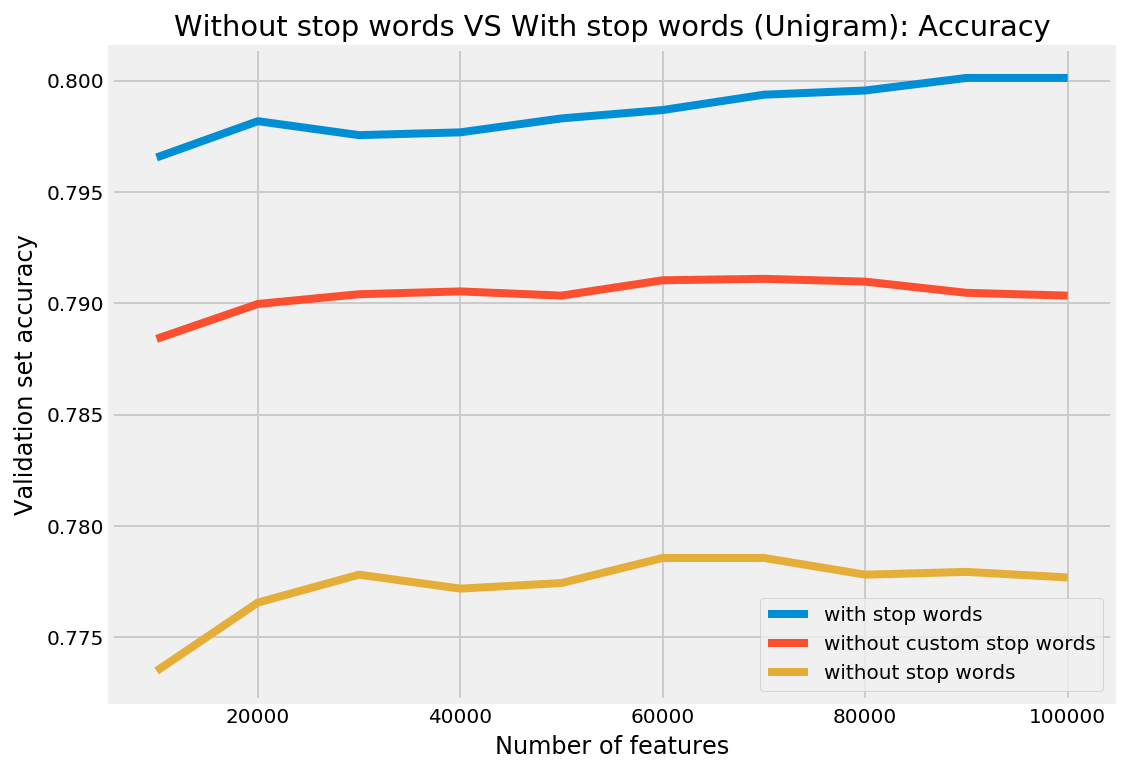

In [36]:
# Visualize results of the comparison
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

#### Bigram

In [29]:
print("RESULT FOR BIGRAM WITH STOP WORDS\n") 
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Null accuracy: 50.55%
Accuracy score: 80.58%
Model is 30.03% more accurate than null accuracy
Train and test time: 183.43s
--------------------------------------------------------------------------------
Validation result for 20000 features
Null accuracy: 50.55%
Accuracy score: 81.37%
Model is 30.82% more accurate than null accuracy
Train and test time: 185.01s
--------------------------------------------------------------------------------
Validation result for 30000 features
Null accuracy: 50.55%
Accuracy score: 81.79%
Model is 31.25% more accurate than null accuracy
Train and test time: 184.36s
---------------------------------------------------------

#### Trigram

In [37]:
print("RESULT FOR TRIGRAM WITH STOP WORDS\n") 
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
Null accuracy: 50.55%
Accuracy score: 80.75%
Model is 30.21% more accurate than null accuracy
Train and test time: 359.58s
--------------------------------------------------------------------------------
Validation result for 20000 features
Null accuracy: 50.55%
Accuracy score: 81.32%
Model is 30.78% more accurate than null accuracy
Train and test time: 376.59s
--------------------------------------------------------------------------------
Validation result for 30000 features
Null accuracy: 50.55%
Accuracy score: 81.82%
Model is 31.27% more accurate than null accuracy
Train and test time: 407.61s
--------------------------------------------------------

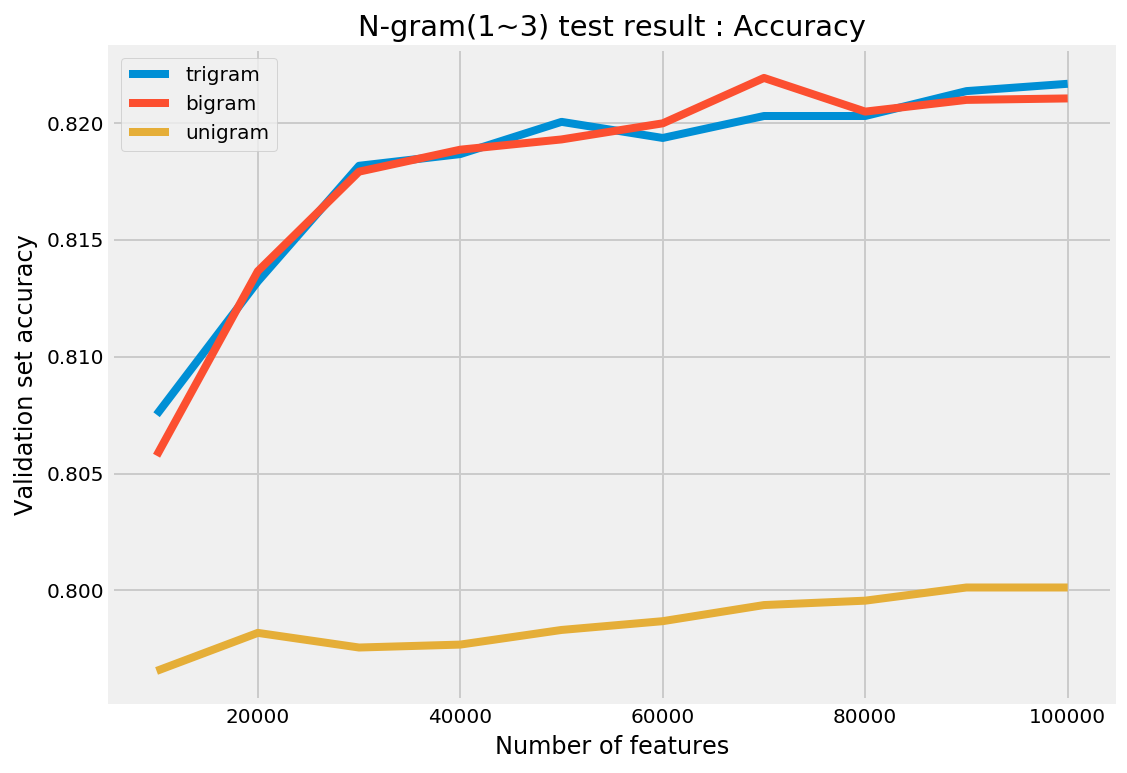

In [38]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()